### 读入数据

In [15]:
normal <- read.csv('/home/shiyu/data/BRCA/normal_processed.txt',row.names=1)

In [16]:
head(normal,2)
dim(normal)

,TCGA.E2.A1L7.11A.33R.A144.07,TCGA.E2.A1IG.11A.22R.A144.07,TCGA.BH.A0BS.11A.11R.A12P.07,TCGA.E9.A1NA.11A.33R.A144.07,TCGA.BH.A0H9.11A.22R.A466.07,TCGA.BH.A0BQ.11A.33R.A115.07,TCGA.BH.A0E0.11A.13R.A089.07,TCGA.BH.A1FH.11B.42R.A13Q.07,TCGA.E9.A1NG.11A.52R.A14M.07,TCGA.BH.A0DO.11A.22R.A12D.07,⋯,TCGA.AC.A2FM.11B.32R.A19W.07,TCGA.BH.A1FJ.11B.42R.A13Q.07,TCGA.E9.A1ND.11A.43R.A144.07,TCGA.BH.A1FU.11A.23R.A14D.07,TCGA.E9.A1RF.11A.32R.A157.07,TCGA.A7.A0DC.11A.41R.A089.07,TCGA.BH.A18J.11A.31R.A12D.07,TCGA.BH.A18R.11A.42R.A12D.07,TCGA.BH.A0DK.11A.13R.A089.07,TCGA.E2.A158.11A.22R.A12D.07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT-CO3,34456.43,45802.14,40792.82,47720.98,54346.61,60060.62,56380.96,47869.80,58207.63,50600.08,⋯,35023.86,63570.27,54583.62,45925.45,63863.59,51241.93,57424.10,56122.94,50574.07,61826.02
MT-ND4,29705.07,74238.67,30958.63,58551.12,47964.09,55195.35,45929.72,37763.14,61651.61,34446.62,⋯,22139.97,41345.61,43288.65,47376.26,86432.27,66828.33,42646.67,58689.28,54750.21,76165.95


[1] 36809   113

In [17]:
tumor <- read.csv('/home/shiyu/data/BRCA/tumor_processed.txt',row.names=1)

In [18]:
head(tumor,2)
dim(tumor)

,TCGA.E2.A1L7.01A.11R.A144.07,TCGA.AR.A0U0.01A.11R.A109.07,TCGA.BH.A28O.01A.11R.A22K.07,TCGA.A2.A0D4.01A.11R.A00Z.07,TCGA.E9.A1R4.01A.21R.A14D.07,TCGA.AO.A1KQ.01A.11R.A13Q.07,TCGA.AC.A62V.01A.11R.A31O.07,TCGA.D8.A143.01A.11R.A115.07,TCGA.A2.A0SV.01A.11R.A084.07,TCGA.AN.A0XW.01A.11R.A109.07,⋯,TCGA.A1.A0SD.01A.11R.A115.07,TCGA.A2.A0SU.01A.11R.A084.07,TCGA.E9.A1NI.01A.11R.A14D.07,TCGA.B6.A0RQ.01A.11R.A115.07,TCGA.E9.A1RF.01A.11R.A157.07,TCGA.A2.A0CX.01A.21R.A00Z.07,TCGA.A2.A25F.01A.11R.A169.07,TCGA.AC.A23G.01A.11R.A213.07,TCGA.E2.A15D.01A.11R.A115.07,TCGA.OL.A5D7.01A.11R.A27Q.07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT-CO3,60859.48,13635.21,45131.34,44445.57,58733.92,50169.14,29106.82,14023.49,41179.52,40394.62,⋯,53670.47,36840.02,38192.28,49247.69,58648.42,60492.38,27152.81,43641.78,43380.90,53751.18
MT-CO2,53032.74,15590.23,32871.44,63374.14,44583.73,56750.21,53759.69,17781.93,58022.51,30415.51,⋯,45032.19,39041.64,64153.96,36566.89,63246.87,60335.37,23692.58,28531.81,40341.66,49299.03


[1] 36809  1106

### 解卷积

In [8]:
library(IOBR)
library(EPIC)
library(estimate) 
library(tidyverse)
library(tidyHeatmap)
library(maftools)
library(ggpubr)
library(ggplot2)
library(survival)
library(UCSCXenaTools)

In [11]:
tme_deconvolution_methods

MCPcounter               EPIC              xCell          CIBERSORT 
      "mcpcounter"             "epic"            "xcell"        "cibersort" 
CIBERSORT Absolute                IPS           ESTIMATE                SVR 
   "cibersort_abs"              "ips"         "estimate"              "svr" 
              lsei              TIMER          quanTIseq 
            "lsei"            "timer"        "quantiseq"

## cibersort

### normal

In [19]:
cibersort<-deconvo_tme(eset = normal, method = "cibersort", arrays = FALSE, perm = 200 )


>>> Running CIBERSORT



In [20]:
cibersort_normal = cibersort

In [24]:
head(cibersort_normal,2)
dim(cibersort_normal)

ID,B_cells_naive_CIBERSORT,B_cells_memory_CIBERSORT,Plasma_cells_CIBERSORT,T_cells_CD8_CIBERSORT,T_cells_CD4_naive_CIBERSORT,T_cells_CD4_memory_resting_CIBERSORT,T_cells_CD4_memory_activated_CIBERSORT,T_cells_follicular_helper_CIBERSORT,T_cells_regulatory_(Tregs)_CIBERSORT,⋯,Macrophages_M2_CIBERSORT,Dendritic_cells_resting_CIBERSORT,Dendritic_cells_activated_CIBERSORT,Mast_cells_resting_CIBERSORT,Mast_cells_activated_CIBERSORT,Eosinophils_CIBERSORT,Neutrophils_CIBERSORT,P-value_CIBERSORT,Correlation_CIBERSORT,RMSE_CIBERSORT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA.E2.A1L7.11A.33R.A144.07,0.09773225,0,0.15610871,0.17125480,0,0.06590141,0,0.02105819,0.03573135,⋯,0.1457013,0.02204932,0,0,0.02719215,0,0,0.005,0.3281939,0.955020
TCGA.E2.A1IG.11A.22R.A144.07,0.07600922,0,0.05986929,0.09875788,0,0.13218245,0,0.03413997,0.00000000,⋯,0.1731232,0.01061552,0,0,0.11574405,0,0,0.035,0.1743223,1.022437


[1] 113  26

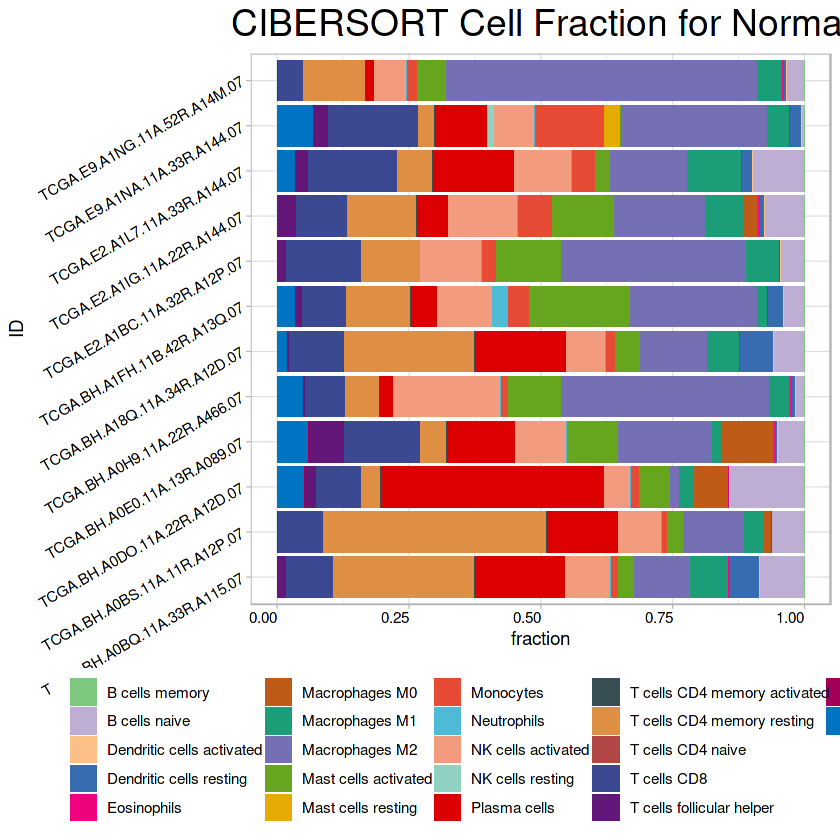

In [22]:
res<-
cell_bar_plot(input = cibersort[1:12,], title = "CIBERSORT Cell Fraction for Normal")

In [23]:
write.csv(cibersort_normal,"/home/shiyu/data/BRCA/deconv/cibersort_normal.txt")  #dataframe转csv

### tumor

In [25]:
cibersort_tumor <- deconvo_tme(eset = tumor, method = "cibersort", arrays = FALSE, perm = 200 )


>>> Running CIBERSORT



In [27]:
head(cibersort_tumor,2)
dim(cibersort_tumor)

ID,B_cells_naive_CIBERSORT,B_cells_memory_CIBERSORT,Plasma_cells_CIBERSORT,T_cells_CD8_CIBERSORT,T_cells_CD4_naive_CIBERSORT,T_cells_CD4_memory_resting_CIBERSORT,T_cells_CD4_memory_activated_CIBERSORT,T_cells_follicular_helper_CIBERSORT,T_cells_regulatory_(Tregs)_CIBERSORT,⋯,Macrophages_M2_CIBERSORT,Dendritic_cells_resting_CIBERSORT,Dendritic_cells_activated_CIBERSORT,Mast_cells_resting_CIBERSORT,Mast_cells_activated_CIBERSORT,Eosinophils_CIBERSORT,Neutrophils_CIBERSORT,P-value_CIBERSORT,Correlation_CIBERSORT,RMSE_CIBERSORT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA.E2.A1L7.01A.11R.A144.07,0.02894675,0,0.05983355,0.1627953,0,0.1546186,0.0000000,0.01249337,0.062209160,⋯,0.1368842,0.04001049,0,0,0.01369220,0,0,0.085,0.1193619,1.0606635
TCGA.AR.A0U0.01A.11R.A109.07,0.02162195,0,0.13057008,0.1207020,0,0.1522790,0.0338686,0.03560712,0.006994624,⋯,0.1580468,0.05127184,0,0,0.03161543,0,0,0.010,0.2267409,0.9957063


[1] 1106   26

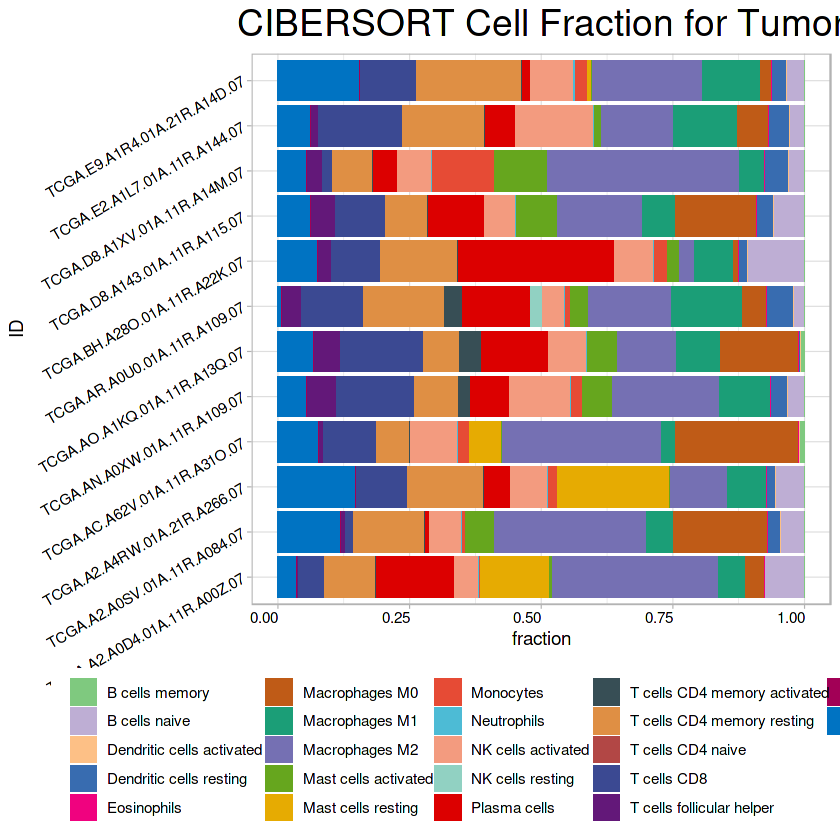

In [28]:
res<-
cell_bar_plot(input = cibersort_tumor[1:12,], title = "CIBERSORT Cell Fraction for Tumor")

In [29]:
write.csv(cibersort_tumor,"/home/shiyu/data/BRCA/deconv/cibersort_tumor.txt")  #dataframe转csv

## timer

### normal

In [35]:
timer_normal <- deconvo_tme(eset = normal, method = "timer", group_list = rep("brca",dim(normal)[2]))

## Enter batch mode



## Loading immune gene expression




[1] "Outlier genes: ACTA1 FTL IGKC MT-CO1 MT-CO2 MT-CO3 MT-CYB MT-ND1 MT-ND2 MT-ND3 MT-ND4 MT-ND6 MT-RNR2"


## Removing the batch effect of /tmp/RtmpqnVzuQ/filea5764c650111


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




In [36]:
head(timer_normal,2)
dim(timer_normal)

ID,B_cell_TIMER,T_cell_CD4_TIMER,T_cell_CD8_TIMER,Neutrophil_TIMER,Macrophage_TIMER,DC_TIMER
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA.E2.A1L7.11A.33R.A144.07,0.10685487,0.1356631,0.2536829,0.1390270,0.1236090,0.5536679
TCGA.E2.A1IG.11A.22R.A144.07,0.09480239,0.1300740,0.1919498,0.1191231,0.0317142,0.5076662


[1] 113   7

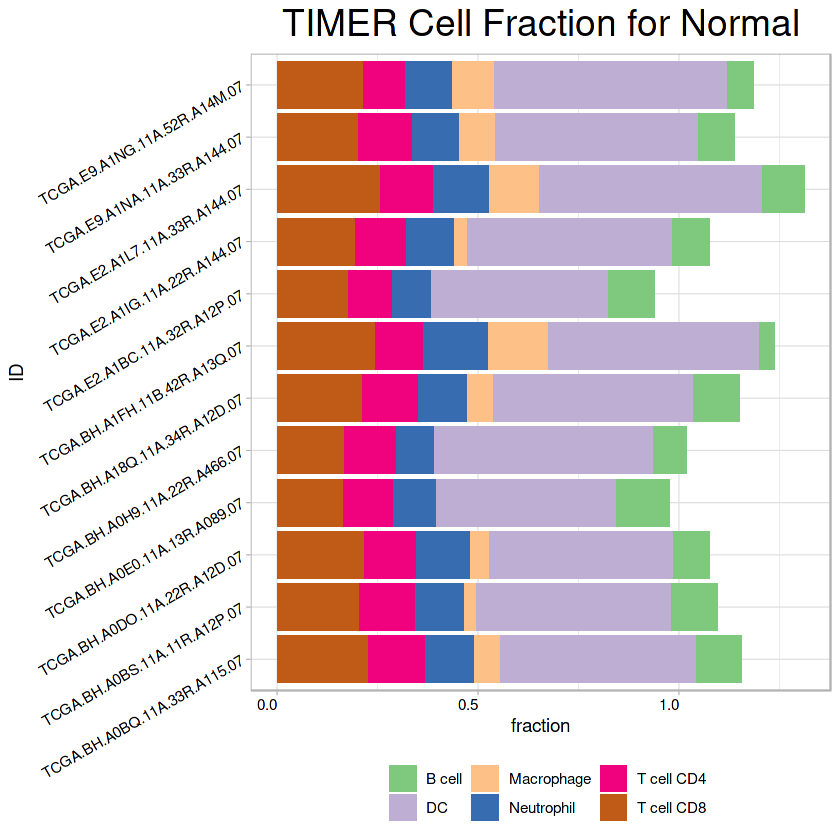

In [43]:
res <- cell_bar_plot(input = timer_normal[1:12,], title = "TIMER Cell Fraction for Normal")

In [38]:
write.csv(timer_normal,"/home/shiyu/data/BRCA/deconv/timer_normal.txt")  #dataframe转csv

### tumor

In [42]:
timer_tumor <- deconvo_tme(eset = tumor, method = "timer", group_list = rep("brca",dim(tumor)[2]))

## Enter batch mode



## Loading immune gene expression




[1] "Outlier genes: AZGP1 CALML5 CARTPT CD24 CHGA COL1A1 CSN2 DCD FDCSP FTL GAPDH HLA-C HSPB1 IGHG1 IGHM IGHV1-18 IGHV3-23 IGHV3-30 IGHV3-73 IGHV4-39 IGHV5-51 IGHV7-4-1 IGKC IGKV1-17 IGKV1-5 IGKV3-20 IGKV4-1 IGLC2 IGLC3 IGLV2-14 IGLV2-23 IGLV3-1 IGLV3-10 IGLV3-19 IGLV3-25 IGLV4-69 IGLV6-57 KRT1 KRT14 KRT19 KRT5 LALBA MALAT1 MGP MT-ATP6 MT-CO1 MT-CO2 MT-CO3 MT-CYB MT-ND1 MT-ND2 MT-ND3 MT-ND4 MT-ND4L MT-ND6 MT-RNR1 MT-RNR2 PIP RN7SL1 RN7SL3 RNU4-1 RNU4-2 RPL19 RPL8 RPLP1 RPS28P7 RPS6 S100A6 S100A8 S100A9 SCARNA5 SCGB1D2 SCGB2A2 SFN SLPI SNORA73B SNORD17 TMSB10 XBP1"


## Removing the batch effect of /tmp/RtmpqnVzuQ/filea5768bd34be


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




In [44]:
head(timer_tumor,2)
dim(timer_tumor)

ID,B_cell_TIMER,T_cell_CD4_TIMER,T_cell_CD8_TIMER,Neutrophil_TIMER,Macrophage_TIMER,DC_TIMER
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA.E2.A1L7.01A.11R.A144.07,0.08055384,0.1711240,0.259377,0.2037999,0.02509057,0.6233064
TCGA.AR.A0U0.01A.11R.A109.07,0.02374276,0.1542622,0.272418,0.2933016,0.00000000,0.6920344


[1] 1106    7

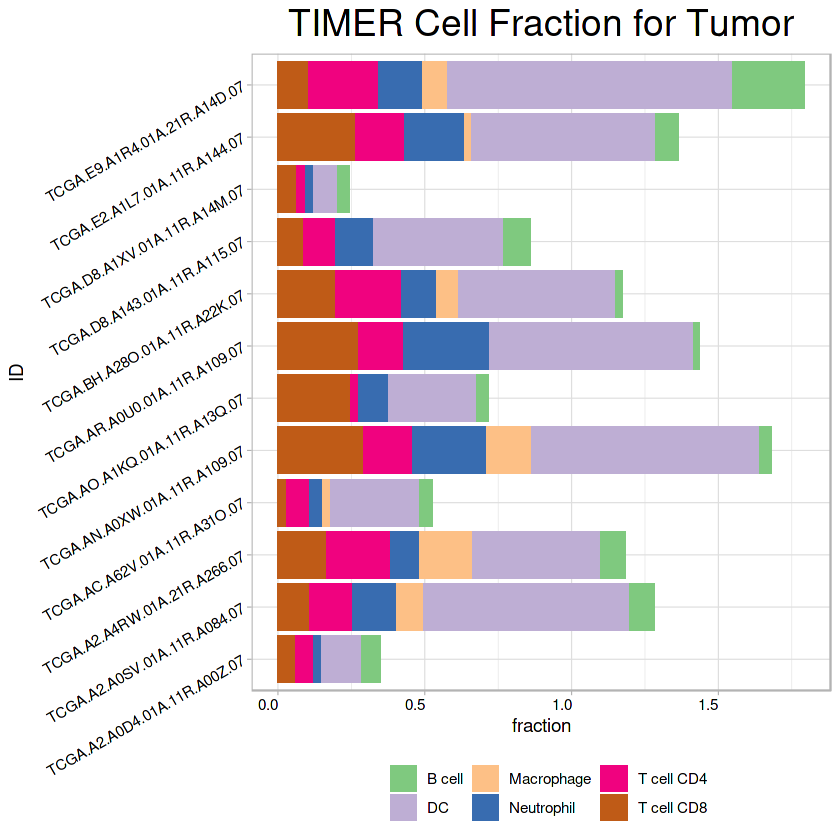

In [45]:
res <- cell_bar_plot(input = timer_tumor[1:12,], title = "TIMER Cell Fraction for Tumor")

In [46]:
write.csv(timer_tumor,"/home/shiyu/data/BRCA/deconv/timer_tumor.txt")  #dataframe转csv

## quantTIseq

### normal

In [47]:
quantiseq_normal <- 
deconvo_tme(eset = normal, tumor = FALSE, arrays = FALSE, scale_mrna = TRUE, method = "quantiseq")


Running quanTIseq deconvolution module


Gene expression normalization and re-annotation (arrays: FALSE)


Removing 17 noisy genes


Signature genes found in data set: 149/153 (97.39%)


Mixture deconvolution (method: lsei)


Deconvolution sucessful!



In [48]:
head(quantiseq_normal,2)
dim(quantiseq_normal)

ID,B_cells_quantiseq,Macrophages_M1_quantiseq,Macrophages_M2_quantiseq,Monocytes_quantiseq,Neutrophils_quantiseq,NK_cells_quantiseq,T_cells_CD4_quantiseq,T_cells_CD8_quantiseq,Tregs_quantiseq,Dendritic_cells_quantiseq,Other_quantiseq
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA.E2.A1L7.11A.33R.A144.07,2.611342e-03,0.11408332,0.12663266,0,0.00000000,0.002550918,0,0.006537118,0.011135947,0,0.7364487
TCGA.E2.A1IG.11A.22R.A144.07,8.592503e-05,0.04063372,0.02164806,0,0.07228542,0.002220689,0,0.000000000,0.005092635,0,0.8580336


[1] 113  12

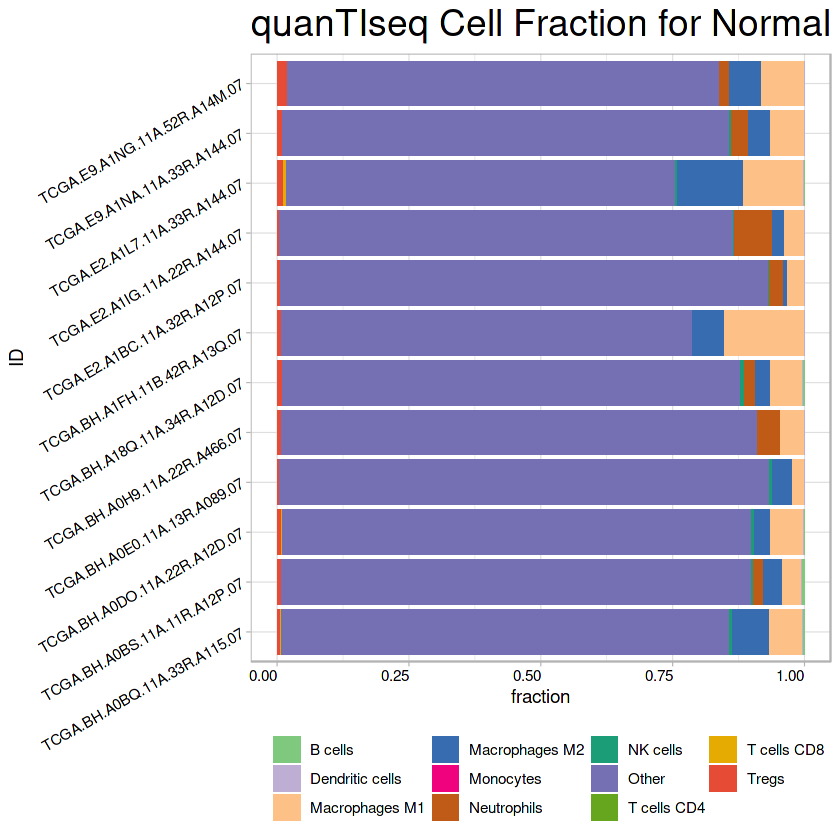

In [49]:
res<-cell_bar_plot(input = quantiseq_normal[1:12, ], title = "quanTIseq Cell Fraction for Normal")

In [50]:
write.csv(quantiseq_normal,"/home/shiyu/data/BRCA/deconv/quantiseq_normal.txt")  #dataframe转csv

### tumor

In [51]:
quantiseq_tumor <- 
deconvo_tme(eset = tumor, tumor = TRUE, arrays = FALSE, scale_mrna = TRUE, method = "quantiseq")


Running quanTIseq deconvolution module


Gene expression normalization and re-annotation (arrays: FALSE)


Removing 17 noisy genes


Removing 15 genes with high expression in tumors


Signature genes found in data set: 134/138 (97.1%)


Mixture deconvolution (method: lsei)


Deconvolution sucessful!



In [53]:
quantiseq_tumor = quantiseq_normal

In [54]:
head(quantiseq_tumor,2)
dim(quantiseq_tumor)

ID,B_cells_quantiseq,Macrophages_M1_quantiseq,Macrophages_M2_quantiseq,Monocytes_quantiseq,Neutrophils_quantiseq,NK_cells_quantiseq,T_cells_CD4_quantiseq,T_cells_CD8_quantiseq,Tregs_quantiseq,Dendritic_cells_quantiseq,Other_quantiseq
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA.E2.A1L7.01A.11R.A144.07,0.007497321,0.000986915,0.08067217,0,0,0.006022286,0.004034316,0.01398672,0.02506247,0,0.8617378
TCGA.AR.A0U0.01A.11R.A109.07,0.007271008,0.015713043,0.09676108,0,0,0.005832470,0.000000000,0.01399710,0.01499534,0,0.8454300


[1] 1106   12

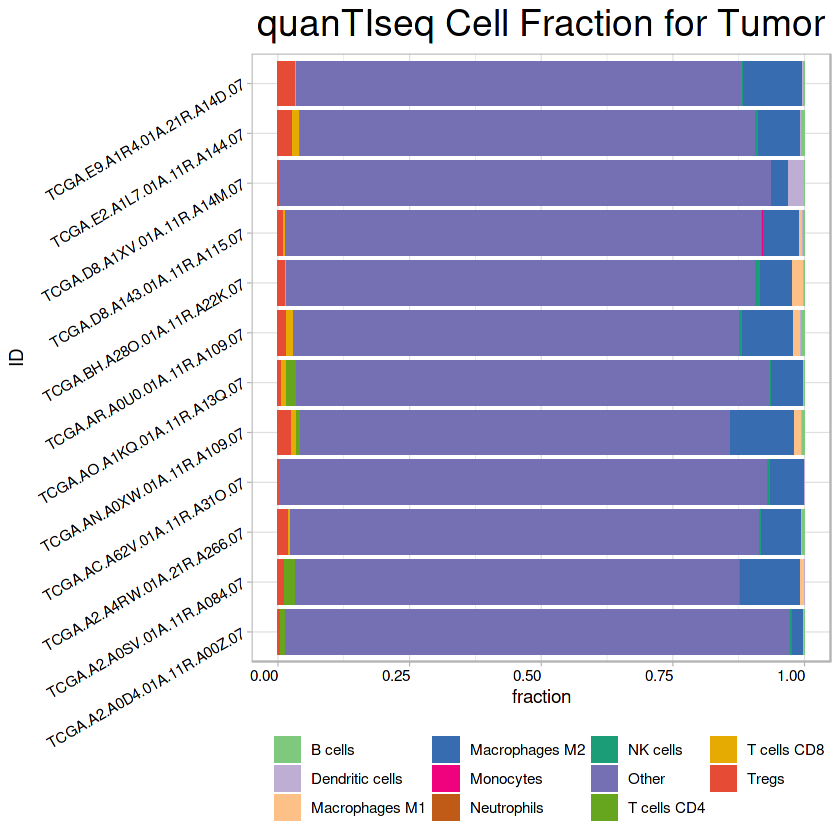

In [55]:
res<-cell_bar_plot(input = quantiseq_tumor[1:12, ], title = "quanTIseq Cell Fraction for Tumor")

In [56]:
write.csv(quantiseq_tumor,"/home/shiyu/data/BRCA/deconv/quantiseq_tumor.txt")  #dataframe转csv

## ensemble

In [65]:
colnames(timer_normal)
length(timer_normal)

[1] "ID"               "B_cell_TIMER"     "T_cell_CD4_TIMER" "T_cell_CD8_TIMER"
[5] "Neutrophil_TIMER" "Macrophage_TIMER" "DC_TIMER"

[1] 7

In [67]:
colnames(cibersort_normal)
length(cibersort_normal)

[1] "ID"                                    
 [2] "B_cells_naive_CIBERSORT"               
 [3] "B_cells_memory_CIBERSORT"              
 [4] "Plasma_cells_CIBERSORT"                
 [5] "T_cells_CD8_CIBERSORT"                 
 [6] "T_cells_CD4_naive_CIBERSORT"           
 [7] "T_cells_CD4_memory_resting_CIBERSORT"  
 [8] "T_cells_CD4_memory_activated_CIBERSORT"
 [9] "T_cells_follicular_helper_CIBERSORT"   
[10] "T_cells_regulatory_(Tregs)_CIBERSORT"  
[11] "T_cells_gamma_delta_CIBERSORT"         
[12] "NK_cells_resting_CIBERSORT"            
[13] "NK_cells_activated_CIBERSORT"          
[14] "Monocytes_CIBERSORT"                   
[15] "Macrophages_M0_CIBERSORT"              
[16] "Macrophages_M1_CIBERSORT"              
[17] "Macrophages_M2_CIBERSORT"              
[18] "Dendritic_cells_resting_CIBERSORT"     
[19] "Dendritic_cells_activated_CIBERSORT"   
[20] "Mast_cells_resting_CIBERSORT"          
[21] "Mast_cells_activated_CIBERSORT"        
[22] "Eosinophils_CIBERSORT"                 
[23] "Neutrophils_CIBERSORT"                 
[24] "P-value_CIBERSORT"                     
[25] "Correlation_CIBERSORT"                 
[26] "RMSE_CIBERSORT"

[1] 26

In [66]:
colnames(quantiseq_normal)
length(quantiseq_normal)

[1] "ID"                        "B_cells_quantiseq"        
 [3] "Macrophages_M1_quantiseq"  "Macrophages_M2_quantiseq" 
 [5] "Monocytes_quantiseq"       "Neutrophils_quantiseq"    
 [7] "NK_cells_quantiseq"        "T_cells_CD4_quantiseq"    
 [9] "T_cells_CD8_quantiseq"     "Tregs_quantiseq"          
[11] "Dendritic_cells_quantiseq" "Other_quantiseq"

[1] 12

### 在cibersort里面合并细胞亚型

In [84]:
reserve <- c('ID','Neutrophils_CIBERSORT','Eosinophils_CIBERSORT',
            'T_cells_gamma_delta_CIBERSORT','Monocytes_CIBERSORT',
            'Plasma_cells_CIBERSORT','T_cells_CD8_CIBERSORT',
             'P-value_CIBERSORT','Correlation_CIBERSORT','RMSE_CIBERSORT')

In [85]:
B_cell_list <- c("B_cells_naive_CIBERSORT", "B_cells_memory_CIBERSORT")
T_cell_CD4_list <- c('T_cells_CD4_naive_CIBERSORT',
                     'T_cells_CD4_memory_resting_CIBERSORT',
                     'T_cells_CD4_memory_activated_CIBERSORT',
                     'T_cells_follicular_helper_CIBERSORT',
                    'T_cells_regulatory_(Tregs)_CIBERSORT')
NK_cell_list <- c('NK_cells_resting_CIBERSORT','NK_cells_activated_CIBERSORT')
Macrophage_list <- c('Macrophages_M0_CIBERSORT','Macrophages_M1_CIBERSORT',
                    'Macrophages_M2_CIBERSORT')
Dendritic_cell_list <- c('Dendritic_cells_resting_CIBERSORT',
                         'Dendritic_cells_activated_CIBERSORT')
Mast_cell_list <- c('Mast_cells_resting_CIBERSORT',
                    'Mast_cells_activated_CIBERSORT')

### normal

In [86]:
cibersort_normal_new <- cibersort_normal[,reserve]

In [87]:
dim(cibersort_normal_new)

[1] 113  10

In [88]:
cibersort_normal_new$B_cell_CIBERSORT <- apply(cibersort_normal[,B_cell_list], 1, sum)
cibersort_normal_new$T_cell_CD4_CIBERSORT <- apply(cibersort_normal[,T_cell_CD4_list], 1, sum)
cibersort_normal_new$NK_cell_CIBERSORT <- apply(cibersort_normal[,NK_cell_list], 1, sum)
cibersort_normal_new$Macrophage_CIBERSORT <- apply(cibersort_normal[,Macrophage_list], 1, sum)
cibersort_normal_new$Dendritic_cell_CIBERSORT <- apply(cibersort_normal[,Dendritic_cell_list], 1, sum)
cibersort_normal_new$Mast_cell_CIBERSORT <- apply(cibersort_normal[,Mast_cell_list], 1, sum)

In [89]:
head(cibersort_normal_new,2)
dim(cibersort_normal_new)

ID,Neutrophils_CIBERSORT,Eosinophils_CIBERSORT,T_cells_gamma_delta_CIBERSORT,Monocytes_CIBERSORT,Plasma_cells_CIBERSORT,T_cells_CD8_CIBERSORT,P-value_CIBERSORT,Correlation_CIBERSORT,RMSE_CIBERSORT,B_cell_CIBERSORT,T_cell_CD4_CIBERSORT,NK_cell_CIBERSORT,Macrophage_CIBERSORT,Dendritic_cell_CIBERSORT,Mast_cell_CIBERSORT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA.E2.A1L7.11A.33R.A144.07,0,0,0,0.04556124,0.15610871,0.17125480,0.005,0.3281939,0.955020,0.09773225,0.1226909,0.1082591,0.2491515,0.02204932,0.02719215
TCGA.E2.A1IG.11A.22R.A144.07,0,0,0,0.06499609,0.05986929,0.09875788,0.035,0.1743223,1.022437,0.07600922,0.1663224,0.1317003,0.2759853,0.01061552,0.11574405


[1] 113  16

In [90]:
write.csv(cibersort_normal_new,"/home/shiyu/data/BRCA/deconv/cibersort_normal_combine.txt")  #dataframe转csv

### tumor

In [91]:
cibersort_tumor_new <- cibersort_tumor[,reserve]
dim(cibersort_tumor_new)

[1] 1106   10

In [92]:
cibersort_tumor_new$B_cell_CIBERSORT <- apply(cibersort_tumor[,B_cell_list], 1, sum)
cibersort_tumor_new$T_cell_CD4_CIBERSORT <- apply(cibersort_tumor[,T_cell_CD4_list], 1, sum)
cibersort_tumor_new$NK_cell_CIBERSORT <- apply(cibersort_tumor[,NK_cell_list], 1, sum)
cibersort_tumor_new$Macrophage_CIBERSORT <- apply(cibersort_tumor[,Macrophage_list], 1, sum)
cibersort_tumor_new$Dendritic_cell_CIBERSORT <- apply(cibersort_tumor[,Dendritic_cell_list], 1, sum)
cibersort_tumor_new$Mast_cell_CIBERSORT <- apply(cibersort_tumor[,Mast_cell_list], 1, sum)

In [93]:
head(cibersort_tumor_new,2)
dim(cibersort_tumor_new)

ID,Neutrophils_CIBERSORT,Eosinophils_CIBERSORT,T_cells_gamma_delta_CIBERSORT,Monocytes_CIBERSORT,Plasma_cells_CIBERSORT,T_cells_CD8_CIBERSORT,P-value_CIBERSORT,Correlation_CIBERSORT,RMSE_CIBERSORT,B_cell_CIBERSORT,T_cell_CD4_CIBERSORT,NK_cell_CIBERSORT,Macrophage_CIBERSORT,Dendritic_cell_CIBERSORT,Mast_cell_CIBERSORT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA.E2.A1L7.01A.11R.A144.07,0,0,0,0.00000000,0.05983355,0.1627953,0.085,0.1193619,1.0606635,0.02894675,0.2293211,0.14714687,0.3182537,0.04001049,0.01369220
TCGA.AR.A0U0.01A.11R.A109.07,0,0,0,0.01195855,0.13057008,0.1207020,0.010,0.2267409,0.9957063,0.02162195,0.2287493,0.06346298,0.3400479,0.05127184,0.03161543


[1] 1106   16

In [94]:
write.csv(cibersort_tumor_new,"/home/shiyu/data/BRCA/deconv/cibersort_tumor_combine.txt")  #dataframe转csv

### 在quantiseq里面合并细胞亚型

In [105]:
quantiseq_normal <- read.csv('/home/shiyu/data/BRCA/deconv/quantiseq_normal.txt')

In [106]:
quantiseq_tumor <- read.csv('/home/shiyu/data/BRCA/deconv/quantiseq_tumor.txt')

In [107]:
reserve <- c('ID','B_cells_quantiseq','Monocytes_quantiseq',
             'Neutrophils_quantiseq','NK_cells_quantiseq',
             'T_cells_CD4_quantiseq','T_cells_CD8_quantiseq',
             'Tregs_quantiseq','Dendritic_cells_quantiseq',
             'Other_quantiseq'
            )

In [108]:
Macrophages_list <- c('Macrophages_M1_quantiseq', 
                     'Macrophages_M2_quantiseq')

### normal

In [109]:
dim(quantiseq_normal)

[1] 113  13

In [110]:
quantiseq_normal_new <- quantiseq_normal[,reserve]
dim(quantiseq_normal_new)
quantiseq_normal_new$Macrophages_quantiseq <- apply(quantiseq_normal[,Macrophages_list], 1, sum)
head(quantiseq_normal_new,2)
dim(quantiseq_normal_new)

[1] 113  10

,ID,B_cells_quantiseq,Monocytes_quantiseq,Neutrophils_quantiseq,NK_cells_quantiseq,T_cells_CD4_quantiseq,T_cells_CD8_quantiseq,Tregs_quantiseq,Dendritic_cells_quantiseq,Other_quantiseq,Macrophages_quantiseq
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TCGA.E2.A1L7.11A.33R.A144.07,2.611342e-03,0,0.00000000,0.002550918,0,0.006537118,0.011135947,0,0.7364487,0.24071598
2,TCGA.E2.A1IG.11A.22R.A144.07,8.592503e-05,0,0.07228542,0.002220689,0,0.000000000,0.005092635,0,0.8580336,0.06228177


[1] 113  11

In [111]:
write.csv(quantiseq_normal_new,"/home/shiyu/data/BRCA/deconv/quantiseq_normal_combine.txt")  #dataframe转csv

### tumor

In [112]:
quantiseq_tumor_new <- quantiseq_tumor[,reserve]
dim(quantiseq_tumor_new)
quantiseq_tumor_new$Macrophages_quantiseq <- apply(quantiseq_tumor[,Macrophages_list], 1, sum)
head(quantiseq_tumor_new,2)
dim(quantiseq_tumor_new)

[1] 1106   10

,ID,B_cells_quantiseq,Monocytes_quantiseq,Neutrophils_quantiseq,NK_cells_quantiseq,T_cells_CD4_quantiseq,T_cells_CD8_quantiseq,Tregs_quantiseq,Dendritic_cells_quantiseq,Other_quantiseq,Macrophages_quantiseq
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TCGA.E2.A1L7.01A.11R.A144.07,0.007497321,0,0,0.006022286,0.004034316,0.01398672,0.02506247,0,0.8617378,0.08165908
2,TCGA.AR.A0U0.01A.11R.A109.07,0.007271008,0,0,0.005832470,0.000000000,0.01399710,0.01499534,0,0.8454300,0.11247413


[1] 1106   11

In [114]:
write.csv(quantiseq_tumor_new,"/home/shiyu/data/BRCA/deconv/quantiseq_tumor_combine.txt")  #dataframe转csv

### 对normal细胞类型比例集成

In [120]:
colnames(timer_normal)
colnames(cibersort_normal_new)
colnames(quantiseq_normal_new)

[1] "ID"               "B_cell_TIMER"     "T_cell_CD4_TIMER" "T_cell_CD8_TIMER"
[5] "Neutrophil_TIMER" "Macrophage_TIMER" "DC_TIMER"

[1] "ID"                            "Neutrophils_CIBERSORT"        
 [3] "Eosinophils_CIBERSORT"         "T_cells_gamma_delta_CIBERSORT"
 [5] "Monocytes_CIBERSORT"           "Plasma_cells_CIBERSORT"       
 [7] "T_cells_CD8_CIBERSORT"         "P-value_CIBERSORT"            
 [9] "Correlation_CIBERSORT"         "RMSE_CIBERSORT"               
[11] "B_cell_CIBERSORT"              "T_cell_CD4_CIBERSORT"         
[13] "NK_cell_CIBERSORT"             "Macrophage_CIBERSORT"         
[15] "Dendritic_cell_CIBERSORT"      "Mast_cell_CIBERSORT"

[1] "ID"                        "B_cells_quantiseq"        
 [3] "Monocytes_quantiseq"       "Neutrophils_quantiseq"    
 [5] "NK_cells_quantiseq"        "T_cells_CD4_quantiseq"    
 [7] "T_cells_CD8_quantiseq"     "Tregs_quantiseq"          
 [9] "Dendritic_cells_quantiseq" "Other_quantiseq"          
[11] "Macrophages_quantiseq"

In [142]:
df_B_cells <- cbind(timer_normal["B_cell_TIMER"],
                        cibersort_normal_new['B_cell_CIBERSORT'],
                        quantiseq_normal_new['B_cells_quantiseq'])

df_T_cell_CD4 <- cbind(timer_normal['T_cell_CD4_TIMER'],
                        cibersort_normal_new['T_cell_CD4_CIBERSORT'],
                        quantiseq_normal_new['T_cells_CD4_quantiseq'])

df_T_cell_CD8 <- cbind(timer_normal["T_cell_CD8_TIMER"],
                        cibersort_normal_new['T_cells_CD8_CIBERSORT'],
                        quantiseq_normal_new['T_cells_CD8_quantiseq'])

df_Neutrophils <- cbind(timer_normal["Neutrophil_TIMER"],
                        cibersort_normal_new['Neutrophils_CIBERSORT'],
                        quantiseq_normal_new['Neutrophils_quantiseq'])

df_Macrophage <- cbind(timer_normal["Macrophage_TIMER"],
                        cibersort_normal_new['Macrophage_CIBERSORT'],
                        quantiseq_normal_new['Macrophages_quantiseq'])

In [144]:
class(df_B_cells)

[1] "data.frame"

In [145]:
B_cell_ensemble <- rowMeans(df_B_cells)
T_cell_CD4_ensemble <- rowMeans(df_T_cell_CD4)
T_cell_CD8_ensemble <- rowMeans(df_T_cell_CD8)
Neutrophils_ensemble <- rowMeans(df_Neutrophils)
Macrophage_ensemble <- rowMeans(df_Macrophage)

In [146]:
normal_ensemble <- cbind(timer_normal['ID'],B_cell_ensemble,
                         T_cell_CD4_ensemble,T_cell_CD8_ensemble,
                         Neutrophils_ensemble,Macrophage_ensemble)
head(normal_ensemble)
dim(normal_ensemble)

,ID,B_cell_ensemble,T_cell_CD4_ensemble,T_cell_CD8_ensemble,Neutrophils_ensemble,Macrophage_ensemble
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TCGA.E2.A1L7.11A.33R.A144.07,0.06906615,0.08611800,0.14382494,0.04634232,0.20449218
2,TCGA.E2.A1IG.11A.22R.A144.07,0.05696585,0.09879880,0.09690256,0.06380285,0.12332708
3,TCGA.BH.A0BS.11A.11R.A12P.07,0.06175914,0.18834184,0.09706028,0.04641229,0.09098057
4,TCGA.E9.A1NA.11A.33R.A144.07,0.03239693,0.08738596,0.12437380,0.05057985,0.17210916
5,TCGA.BH.A0H9.11A.22R.A466.07,0.03358136,0.08286027,0.08093867,0.04603071,0.16113077
6,TCGA.BH.A0BQ.11A.33R.A115.07,0.06798940,0.14268837,0.10661847,0.04039759,0.12676999


[1] 113   6

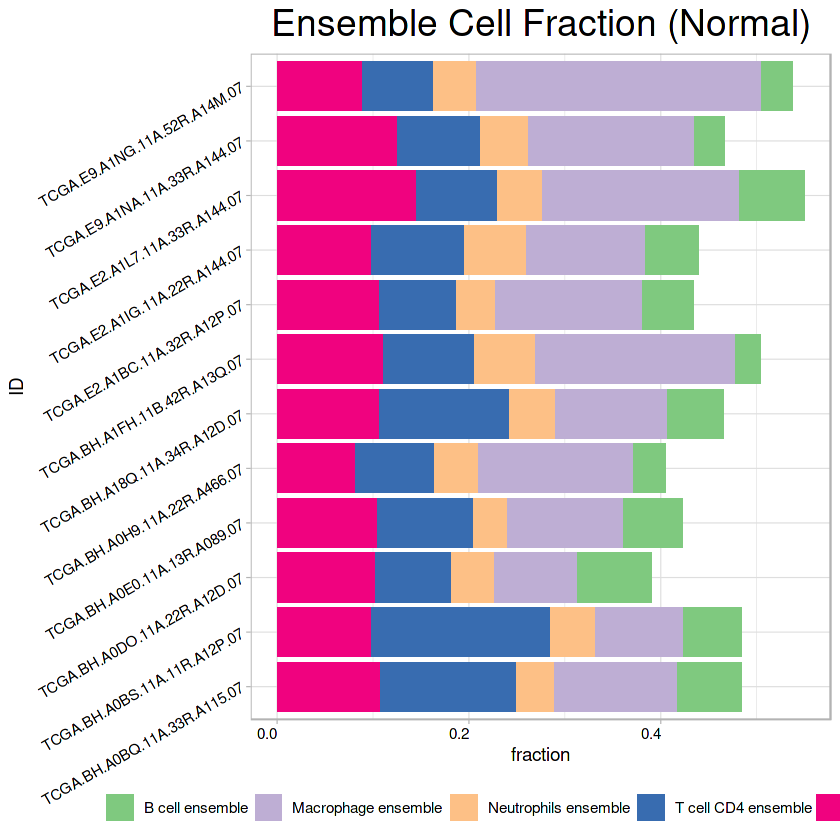

In [168]:
res<-
cell_bar_plot(input = normal_ensemble[1:12,], title = "Ensemble Cell Fraction (Normal)")

In [148]:
write.csv(normal_ensemble,"/home/shiyu/data/BRCA/deconv/normal_ensemble.txt")  #dataframe转csv

### 对tumor细胞比例集成

,ID,B_cell_ensemble,T_cell_CD4_ensemble,T_cell_CD8_ensemble,Neutrophils_ensemble,Macrophage_ensemble
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TCGA.E2.A1L7.01A.11R.A144.07,0.03899931,0.13482649,0.14538632,0.067933287,0.14166780
2,TCGA.AR.A0U0.01A.11R.A109.07,0.01754524,0.12767052,0.13570567,0.097767197,0.15084066
3,TCGA.BH.A28O.01A.11R.A22K.07,0.04617948,0.15823256,0.09660686,0.039641734,0.09121171
4,TCGA.A2.A0D4.01A.11R.A00Z.07,0.04795744,0.06962028,0.03625331,0.009651672,0.14244113
5,TCGA.E9.A1R4.01A.21R.A14D.07,0.09634019,0.19805699,0.07115015,0.050502212,0.18070045
6,TCGA.AO.A1KQ.01A.11R.A13Q.07,0.01827259,0.09220644,0.13745317,0.033635358,0.13624724


[1] 1106    6

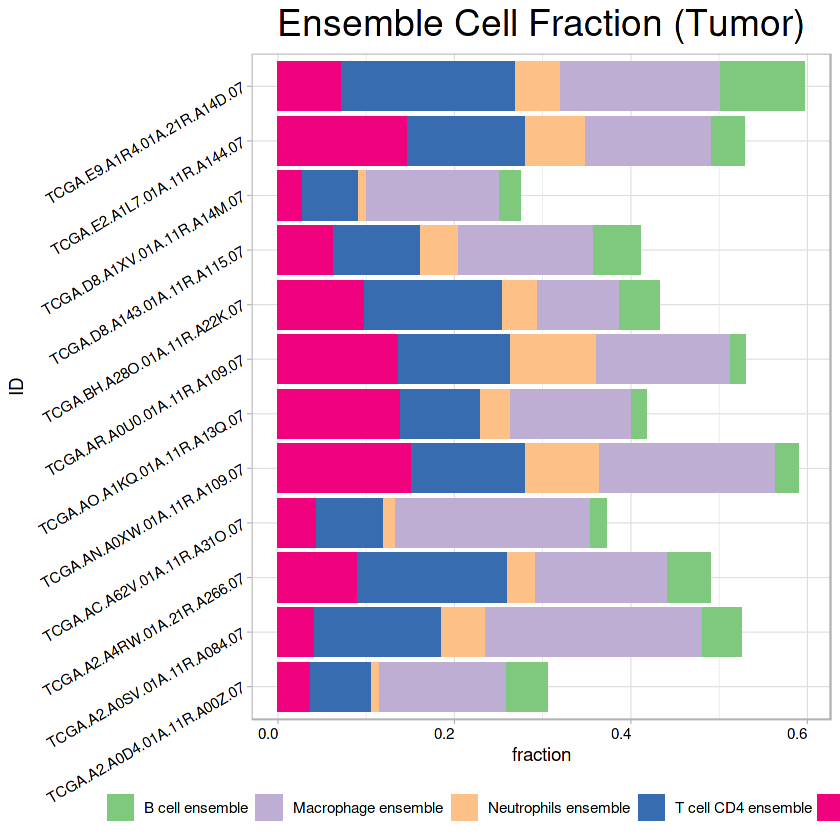

In [167]:
df_B_cells <- cbind(timer_tumor["B_cell_TIMER"],
                        cibersort_tumor_new['B_cell_CIBERSORT'],
                        quantiseq_tumor_new['B_cells_quantiseq'])

df_T_cell_CD4 <- cbind(timer_tumor['T_cell_CD4_TIMER'],
                        cibersort_tumor_new['T_cell_CD4_CIBERSORT'],
                        quantiseq_tumor_new['T_cells_CD4_quantiseq'])

df_T_cell_CD8 <- cbind(timer_tumor["T_cell_CD8_TIMER"],
                        cibersort_tumor_new['T_cells_CD8_CIBERSORT'],
                        quantiseq_tumor_new['T_cells_CD8_quantiseq'])

df_Neutrophils <- cbind(timer_tumor["Neutrophil_TIMER"],
                        cibersort_tumor_new['Neutrophils_CIBERSORT'],
                        quantiseq_tumor_new['Neutrophils_quantiseq'])

df_Macrophage <- cbind(timer_tumor["Macrophage_TIMER"],
                        cibersort_tumor_new['Macrophage_CIBERSORT'],
                        quantiseq_tumor_new['Macrophages_quantiseq'])

B_cell_ensemble <- rowMeans(df_B_cells)
T_cell_CD4_ensemble <- rowMeans(df_T_cell_CD4)
T_cell_CD8_ensemble <- rowMeans(df_T_cell_CD8)
Neutrophils_ensemble <- rowMeans(df_Neutrophils)
Macrophage_ensemble <- rowMeans(df_Macrophage)


tumor_ensemble <- cbind(timer_tumor['ID'],B_cell_ensemble,
                         T_cell_CD4_ensemble,T_cell_CD8_ensemble,
                         Neutrophils_ensemble,Macrophage_ensemble)
head(tumor_ensemble)
dim(tumor_ensemble)

res<-
cell_bar_plot(input = tumor_ensemble[1:12,], title = "Ensemble Cell Fraction (Tumor)")

In [164]:
write.csv(tumor_ensemble,"/home/shiyu/data/BRCA/deconv/tumor_ensemble.txt")  #dataframe转csv

### 选取要进行差异分析的免疫细胞

选取的免疫细胞为Neutrophils，因为这种细胞类型在3种方法的都有出现

In [169]:
normal_neutrophils <- normal_ensemble['Neutrophils_ensemble']
tumor_neutrophils <- tumor_ensemble['Neutrophils_ensemble']

write.csv(normal_neutrophils,"/home/shiyu/data/BRCA/normal_neutrophils.txt")  #dataframe转csv
write.csv(tumor_neutrophils,"/home/shiyu/data/BRCA/tumor_neutrophils.txt")  #dataframe转csv